100000


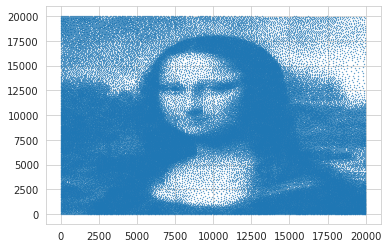

In [5]:
import os
import matplotlib.pyplot as plt
ids = []
x_array = []
y_array = []
with open("mona-lisa100K.tsp", "r") as f:
    for line in f.readlines():
        if line.startswith("EOF"):
            break
        # print(line)
        i, x, y = line.split()
        ids.append(i)
        x_array.append(int(x))
        y_array.append(int(y))
    
    print(len(ids))

plt.scatter(x_array, y_array, s=0.1)

In [6]:
import static, animated, util, heuristic
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

import numpy as np
np.random.seed(7)

n_customers = 9
figsize = (8,8)

coords = list(zip(x_array[:1000], y_array[:1000]))
nodes = list(range(len(coords)))

In [7]:
random_start = np.random.randint(len(nodes))
nn_route = heuristic.get_route_nearest_neighborhood(nodes[1:], coords, start=random_start)
print(f"Starting from: {random_start} - Route: {nn_route}")

Starting from: 175 - Route: (0, 560, 546, 802, 876, 610, 617, 463, 782, 526, 745, 304, 346, 750, 224, 187, 218, 108, 515, 6, 780, 198, 887, 764, 365, 657, 860, 204, 913, 355, 295, 446, 954, 847, 996, 553, 658, 978, 837, 867, 588, 579, 904, 106, 964, 166, 245, 142, 214, 401, 300, 82, 502, 636, 11, 102, 328, 969, 53, 556, 369, 217, 293, 493, 275, 813, 512, 232, 56, 743, 104, 171, 353, 94, 830, 390, 382, 433, 359, 468, 480, 50, 855, 368, 260, 263, 660, 323, 84, 107, 809, 878, 177, 805, 459, 461, 132, 402, 422, 475, 211, 348, 170, 235, 794, 455, 831, 227, 710, 974, 514, 309, 385, 975, 91, 105, 25, 118, 894, 71, 839, 174, 942, 485, 990, 175, 349, 43, 415, 677, 371, 127, 61, 395, 600, 168, 510, 86, 863, 98, 628, 928, 706, 381, 178, 41, 238, 581, 116, 626, 120, 183, 269, 299, 308, 69, 96, 882, 672, 38, 583, 943, 869, 173, 447, 790, 281, 444, 426, 537, 907, 396, 4, 898, 35, 718, 522, 856, 267, 701, 130, 302, 685, 478, 134, 822, 792, 756, 630, 952, 567, 705, 683, 989, 190, 429, 222, 192, 273, 3

In [8]:
animated.construct_route(nn_route, coords, nodes, figsize=figsize)

In [9]:
import itertools as it
import numpy as np
n = 4
k = 2
customers = np.arange(4)


# How many subsets are possible?



[list(it.combinations(customers, i)) for i in range(k+1)]

[[()],
 [(0,), (1,), (2,), (3,)],
 [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]]

In [45]:
import math
from pprint import pprint
def get_brute_force(customers, n_vehicles=1):
    # Only accept single-digit customer ids
    if np.max(customers) > 9:
        return None
    
    routes = ["".join(c) for c in list(it.permutations(["|"] *(n_vehicles-1) + list(map(str,set(customers)))))]
    return [[tuple(map(int,list(e))) for e in r.split("|")] for r in routes]

get_brute_force([1,2,3,4,5,6,7], n_vehicles=2)

[[(), (1, 2, 3, 4, 5, 6, 7)],
 [(), (1, 2, 3, 4, 5, 7, 6)],
 [(), (1, 2, 3, 4, 6, 5, 7)],
 [(), (1, 2, 3, 4, 6, 7, 5)],
 [(), (1, 2, 3, 4, 7, 5, 6)],
 [(), (1, 2, 3, 4, 7, 6, 5)],
 [(), (1, 2, 3, 5, 4, 6, 7)],
 [(), (1, 2, 3, 5, 4, 7, 6)],
 [(), (1, 2, 3, 5, 6, 4, 7)],
 [(), (1, 2, 3, 5, 6, 7, 4)],
 [(), (1, 2, 3, 5, 7, 4, 6)],
 [(), (1, 2, 3, 5, 7, 6, 4)],
 [(), (1, 2, 3, 6, 4, 5, 7)],
 [(), (1, 2, 3, 6, 4, 7, 5)],
 [(), (1, 2, 3, 6, 5, 4, 7)],
 [(), (1, 2, 3, 6, 5, 7, 4)],
 [(), (1, 2, 3, 6, 7, 4, 5)],
 [(), (1, 2, 3, 6, 7, 5, 4)],
 [(), (1, 2, 3, 7, 4, 5, 6)],
 [(), (1, 2, 3, 7, 4, 6, 5)],
 [(), (1, 2, 3, 7, 5, 4, 6)],
 [(), (1, 2, 3, 7, 5, 6, 4)],
 [(), (1, 2, 3, 7, 6, 4, 5)],
 [(), (1, 2, 3, 7, 6, 5, 4)],
 [(), (1, 2, 4, 3, 5, 6, 7)],
 [(), (1, 2, 4, 3, 5, 7, 6)],
 [(), (1, 2, 4, 3, 6, 5, 7)],
 [(), (1, 2, 4, 3, 6, 7, 5)],
 [(), (1, 2, 4, 3, 7, 5, 6)],
 [(), (1, 2, 4, 3, 7, 6, 5)],
 [(), (1, 2, 4, 5, 3, 6, 7)],
 [(), (1, 2, 4, 5, 3, 7, 6)],
 [(), (1, 2, 4, 5, 6, 3, 7)],
 [(), (1, 

In [18]:
import math
from pprint import pprint
routes = ["".join(c) for c in sorted(list(set(it.permutations(["|", "1","2","3"]))))]
routes

['123|',
 '12|3',
 '132|',
 '13|2',
 '1|23',
 '1|32',
 '213|',
 '21|3',
 '231|',
 '23|1',
 '2|13',
 '2|31',
 '312|',
 '31|2',
 '321|',
 '32|1',
 '3|12',
 '3|21',
 '|123',
 '|132',
 '|213',
 '|231',
 '|312',
 '|321']

In [19]:
print(len(routes))
print(math.factorial(3) * math.factorial(2))
pprint(routes)

24
12
['123|',
 '12|3',
 '132|',
 '13|2',
 '1|23',
 '1|32',
 '213|',
 '21|3',
 '231|',
 '23|1',
 '2|13',
 '2|31',
 '312|',
 '31|2',
 '321|',
 '32|1',
 '3|12',
 '3|21',
 '|123',
 '|132',
 '|213',
 '|231',
 '|312',
 '|321']


In [26]:
from pprint import pprint
div = set()
for r in routes:
    s = r.split("|")
    a = map(set, list(map(list, s)))
    print(list(a))
    #t = tuple([frozenset(map(int, e)) for e in list(a)])
    #print(t)
    #div.add(t)
    #print(t)
#list_div = sorted([tuple(["".join(map(str,i)) for i in list(map(list, e))]) for e in list(div)])
#print(len(list_div))
#pprint(list_div)

[{'3', '2', '1'}, set()]
[{'2', '1'}, {'3'}]
[{'3', '2', '1'}, set()]
[{'3', '1'}, {'2'}]
[{'1'}, {'3', '2'}]
[{'1'}, {'3', '2'}]
[{'3', '2', '1'}, set()]
[{'2', '1'}, {'3'}]
[{'3', '2', '1'}, set()]
[{'3', '2'}, {'1'}]
[{'2'}, {'3', '1'}]
[{'2'}, {'3', '1'}]
[{'3', '2', '1'}, set()]
[{'3', '1'}, {'2'}]
[{'3', '2', '1'}, set()]
[{'3', '2'}, {'1'}]
[{'3'}, {'2', '1'}]
[{'3'}, {'2', '1'}]
[set(), {'3', '2', '1'}]
[set(), {'3', '2', '1'}]
[set(), {'3', '2', '1'}]
[set(), {'3', '2', '1'}]
[set(), {'3', '2', '1'}]
[set(), {'3', '2', '1'}]
